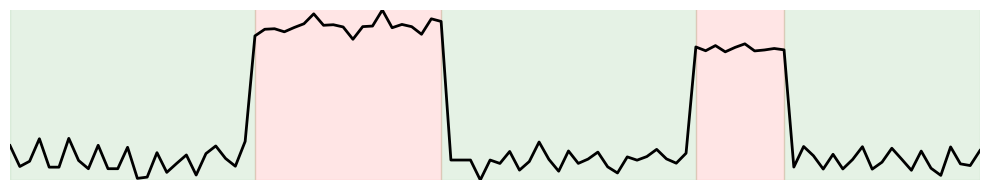

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [14]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)


# 构造数据，这里简单模拟不同阶段的波动，你可根据实际需求调整
x = np.arange(0, 100, 1)*np.pi*2/3
y = np.cos(x)*0.5
plt.figure(figsize=(10,2))

y+=np.random.normal(0, 0.3, len(y))

y[20:25]+=np.arange(1, 6, 1)*0.1
y[25:45]=np.random.normal(6, 0.3, 20)
y[45:50]-=np.arange(3, -3, -0.5)[:5]

y[70:80]=np.random.normal(5, 0.1, 10)
# y[70:80]+=
y[y<-1]=0

anom_range1 = [25,45]
anom_range2 = [70,80]

normal_range1 = [0,25]
normal_range2 = [45,70]
normal_range3 = [80,100]

ymin= 0.
linewidth=2


y_label = np.zeros_like(y)
y_label[anom_range1[0]:anom_range1[1]] = 1
y_label[anom_range2[0]:anom_range2[1]] = 1
plt.plot(x, y, color='black', linewidth=linewidth)
plt.axvspan(x[normal_range1[0]], x[normal_range1[1]], ymin=ymin,ymax=6, color='green', alpha=0.1)
plt.axvspan(x[normal_range2[0]-1], x[normal_range2[1]], ymin=ymin,ymax=6, color='green', alpha=0.1)
plt.axvspan(x[anom_range1[0]], x[anom_range1[1]-1], ymin=ymin,ymax=6, color='red', alpha=0.1)
plt.axvspan(x[anom_range2[0]], x[anom_range2[1]-1], ymin=ymin,ymax=5, color='red', alpha=0.1)
plt.axvspan(x[normal_range3[0]-1], x[normal_range3[1]-1], ymin=ymin,ymax=6, color='green', alpha=0.1)
# plt.plot(x,y_label, color='blue', linewidth=1)
plt.xlim(0, x[-1])
plt.ylim(y.min(),y.max())
plt.axis('off')  # 去除坐标轴，更贴近你提供的图样式
plt.tight_layout()
plt.show()


print(y_label)

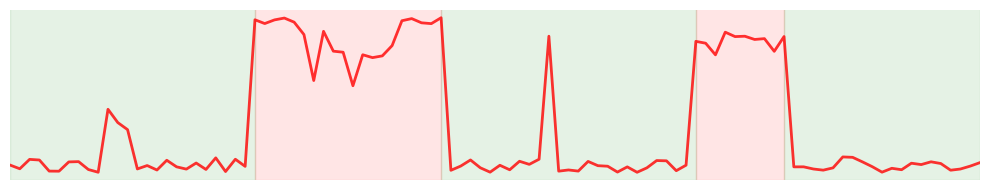

[0.84036198 0.82839559 0.75390706 0.89918499 0.87088539 0.87323782
 0.8524251  0.85778862 0.77648546 0.87110138]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [15]:
import numpy as np
import random
ssd=443213
random.seed(ssd)
np.random.seed(ssd)


# short for PreQ-NegP
def precision_q_nagative_alert_p_model(labels, q=0.8, p=0.05, init_seed=42):
    np.random.seed(init_seed)
    random.seed(init_seed)
    scores = np.random.uniform(0, 0.1, len(labels))
    anomaly_indices = np.where(labels == 1)[0]
    precision_q = q
    nagative_alert_p = p
    # 100*precsion_q%的异常被检测到
    detected = np.random.choice(anomaly_indices, size=int(precision_q * len(anomaly_indices)), replace=False)
    scores[detected] = np.random.uniform(0.8, 1.0, len(detected))
    
    # 100*nagative_alert_p%的正常点被误报
    normal_indices = np.where(labels == 0)[0]
    false_positives = np.random.choice(normal_indices, size=int(nagative_alert_p * len(normal_indices)), replace=False)
    scores[false_positives] = np.random.uniform(0.7, 1.0, len(false_positives))
    return scores


mdl1 = np.random.uniform(0, 0.1, len(y))
mdl1[anom_range1[0]:anom_range1[1]]=np.random.uniform(0.95, 1.0, anom_range1[1]-anom_range1[0])
tmp = mdl1[anom_range1[0]+5:anom_range1[1]-5]
mdl1[anom_range1[0]+5:anom_range1[1]-5] = np.random.normal(0.75,0.1,len(tmp))
# mdl1[35] = 0.0
# print(np.random.normal(0.6,1,len(tmp)))

mdl1[anom_range2[0]:anom_range2[1]]=np.random.uniform(0.75, 0.9, anom_range2[1]-anom_range2[0])

# mdl1[normal_range1[0]:normal_range1[1]]=np.random.normal(0.1,0.05,len(normal_range1))
# mdl1[normal_range2[0]:normal_range2[1]]=np.random.normal(0.1,0.05,len(normal_range2))
# mdl1[normal_range3[0]:normal_range3[1]]=np.random.normal(0.1,0.05,len(normal_range3))
mdl1[mdl1>1] = 1.0
mdl1[10:13] = np.random.normal(0.3,0.05,3)
mdl1[55:56] = np.random.normal(0.8,0.05,1)
# plot
plt.figure(figsize=(10, 2))
# plt.plot(y, color='black', linewidth=1)
plt.plot(x,mdl1, color='red', linewidth=linewidth,alpha=0.8)

plt.axvspan(x[normal_range1[0]], x[normal_range1[1]], ymin=ymin,ymax=6, color='green', alpha=0.1)
plt.axvspan(x[normal_range2[0]-1], x[normal_range2[1]], ymin=ymin,ymax=6, color='green', alpha=0.1)
plt.axvspan(x[anom_range1[0]], x[anom_range1[1]-1], ymin=ymin,ymax=6, color='red', alpha=0.1)
plt.axvspan(x[anom_range2[0]], x[anom_range2[1]-1], ymin=ymin,ymax=5, color='red', alpha=0.1)
plt.axvspan(x[normal_range3[0]-1], x[normal_range3[1]-1], ymin=ymin,ymax=6, color='green', alpha=0.1)
# plt.plot(x,y_label, color='blue', linewidth=1)
plt.xlim(0, x[-1])
# plt.ylim(y.min(),y.max())
plt.axis('off')  # 去除坐标轴，更贴近你提供的图样式
plt.tight_layout()
plt.show()

print(mdl1[anom_range2[0]:anom_range2[1]])
print(y_label[anom_range2[0]:anom_range2[1]])



In [16]:
from itertools import groupby
from operator import itemgetter
import numpy as np


def convert_vector_to_events(vector):
    """
    Convert a binary vector (indicating 1 for the anomalous instances)
    to a list of events. The events are considered as durations,
    i.e. setting 1 at index i corresponds to an anomalous interval [i, i+1).
    
    :param vector: a list of elements belonging to {0, 1}
    :return: a list of couples, each couple representing the start and stop of
    each event
    """
    positive_indexes = [idx for idx, val in enumerate(vector) if val > 0]
    events = []
    for k, g in groupby(enumerate(positive_indexes), lambda ix : ix[0] - ix[1]):
        cur_cut = list(map(itemgetter(1), g))
        events.append((cur_cut[0], cur_cut[-1]))
    
    # Consistent conversion in case of range anomalies (for indexes):
    # A positive index i is considered as the interval [i, i+1),
    # so the last index should be moved by 1
    events = [(x, y+1) for (x,y) in events]
        
    return (events)


class ConfidenceConsistencyEvaluation:
    # or name "UncertaintyAwareConfidenceConsistencyAnomalyMetric"
    """
    基于不确定度的异常检测评估指标
    
    核心思想：
    1. 量化模型对不同区域的不确定性
    2. 异常区域应该有高置信度高一致性
    3. 正常区域应该有低置信度高一致性
    4. 通过不确定度与真实标签的一致性来评估模型
    """
    
    def __init__(self,  method='bayesian_v2', confidence_level=0.5, n_bootstrap_samples=100, positive_constraint=False,
                 bayesian_scale=10):
        """
        初始化评估器
        
        Args:
            n_bootstrap_samples: 用于估计不确定度的bootstrap样本数
            confidence_level: 置信区间水平, 默认为0.5。
        """
        self.n_bootstrap_samples = n_bootstrap_samples
        self.confidence_level = confidence_level
        self.method = method
        self.positive_constraint = positive_constraint
        self.bayesian_scale = bayesian_scale  # 贝叶斯方法的缩放因子
    
    def estimate_uncertainty(self, model_scores, method='bayesian'):
        """
        估计模型分数的不确定性
        
        Args:
            model_scores: 模型预测分数
            method: 不确定度估计方法 ('bootstrap', 'ensemble', 'bayesian', 'gaussian')
            
        Returns:
            uncertainty_scores: 不确定度分数
        """
        if method == 'bootstrap':
            # TODO, TODEBUG
            return self._bootstrap_uncertainty(model_scores)
        elif method == 'ensemble':
            # TODO, TODEBUG
            return self._ensemble_uncertainty(model_scores)
        elif method == 'bayesian':
            return self._bayesian_uncertainty(model_scores, self.bayesian_scale)
        elif method == 'bayesian_v2':
            return self._bayesian_uncertainty_v2(model_scores, self.bayesian_scale)
        elif method == 'gaussian':
            return self._gaussian_uncertainty(model_scores)
        else:
            raise ValueError(f"Unsupported uncertainty method: {method}")
    
    def _bootstrap_uncertainty(self, model_scores):
        """
        使用bootstrap方法估计不确定度
        """
        n_samples = len(model_scores)
        bootstrap_scores = []
        
        for _ in range(self.n_bootstrap_samples):
            # 随机采样（有放回）
            indices = np.random.choice(n_samples, size=n_samples, replace=True)
            bootstrap_scores.append(model_scores[indices])
        
        bootstrap_scores = np.array(bootstrap_scores)
        
        # 计算每个位置的方差作为不确定度
        uncertainty = np.var(bootstrap_scores, axis=0)
        
        return uncertainty
    
    def _ensemble_uncertainty(self, model_scores):
        """
        使用集成方法估计不确定度（模拟多个模型的预测）
        """
        # 模拟多个模型的预测
        ensemble_scores = []
        
        for i in range(self.n_bootstrap_samples):
            # 添加随机噪声模拟不同模型的预测
            noise = np.random.normal(0, 0.1, len(model_scores))
            ensemble_score = model_scores + noise
            ensemble_score = np.clip(ensemble_score, 0, 1)
            ensemble_scores.append(ensemble_score)
        
        ensemble_scores = np.array(ensemble_scores)
        uncertainty = np.var(ensemble_scores, axis=0)
        
        return uncertainty
    
    def _bayesian_uncertainty_v2(self, data, scale=10):
        # 计算样本均值
        mean_x = np.mean(data)
        # 计算样本二阶中心矩
        m2 = np.mean((data - mean_x) ** 2)

        # 估计alpha和beta
        alpha = mean_x * ((mean_x * (1 - mean_x) / m2) - 1) #* scale + 1
        beta = (1 - mean_x) * ((mean_x * (1 - mean_x) / m2) - 1)# * scale + 1

        # 计算Beta分布的方差
        uncertainty = (alpha * beta) / ((alpha + beta) ** 2 * (alpha + beta + 1))
        return uncertainty
    
    def _bayesian_uncertainty(self, model_scores, scale=10):
        """
        使用贝叶斯方法估计不确定度
        """
        # 使用Beta分布建模分数的不确定性
        # 将分数转换为Beta分布的参数
        alpha = model_scores * scale + 1  # 避免参数为0
        beta = (1 - model_scores) * scale + 1
        
        # 计算Beta分布的方差作为不确定度
        uncertainty = (alpha * beta) / ((alpha + beta) ** 2 * (alpha + beta + 1))
        uncertainty = np.mean(uncertainty)
        return uncertainty
    
    def _gaussian_uncertainty(self, model_scores):
        """
        使用高斯分布估计不确定度
        """
        uncertainty = np.var(model_scores)
        return uncertainty
    
    def metric_score(self, y_true, y_scores):
        """
        计算基于不确定度的异常检测评估分数
        """
        score = self.compute_confidence_consistency_score(y_true, y_scores, self.method)
        return {
            'confidence_consistency_score': score,
        }
        
    def _anom_event_score(self, y_score):
        mu = np.mean(y_score)
        uncertainty = self.estimate_uncertainty(y_score, self.method)
        print('Anom Ori Uncertainty:',uncertainty)
        consistency = np.exp(-uncertainty)
        if self.positive_constraint:
            confidence = max(mu - self.confidence_level,0)
        else:
            confidence = mu - self.confidence_level
        score = confidence * consistency
        print('Anom Confidence:',confidence)
        print('Anom Consistency:',consistency)
        return score
    
    def _normal_event_score(self, y_score):
        mu = np.mean(y_score)
        uncertainty = self.estimate_uncertainty(y_score, self.method)
        # print('Normal Ori Uncertainty:',uncertainty)
        consistency = np.exp(-uncertainty)
        if self.positive_constraint:
            confidence = max(1 - self.confidence_level - mu,0)
        else:
            confidence = 1 - self.confidence_level - mu
        score = confidence * consistency
        print('Normal Confidence:',confidence)
        print('Normal Consistency:',consistency)
        return score
    
    def _event_score_v2(self, anom_uncertainty,normal_uncertainty, weight=0.5):
        anom_score = np.mean(anom_uncertainty)
        norm_score = np.mean(normal_uncertainty)
        event_score = anom_score * weight + norm_score * (1 - weight)
        return event_score
    
    def _global_score_v2(self, y_true, y_scores, weight=0.5):
        anom_list = y_scores[y_true==1]
        norm_list = y_scores[y_true==0]
        glo_anom_score = self._anom_event_score(anom_list)
        glo_norm_score = self._normal_event_score(norm_list)
        glo_score = glo_anom_score * weight + glo_norm_score * (1 - weight)
        return glo_score
    
    # 更鲁棒的版本
    def compute_confidence_consistency_score_v2(self, y_true, y_scores, weight=0.5):
        """
        计算基于不确定度的异常检测评估分数
        
        Args:
            y_true: 真实标签
            y_scores: 模型预测分数
            method: 不确定度估计方法
            
        Returns:
            UCE分数, 0-1, 越大保持一致性越好, 结果越可信
        """
        # ytrue只有0或者1
        y_true = y_true.astype(int)
        
        # 获取异常区间 
        anom_events = convert_vector_to_events(y_true)
        normal_events = convert_vector_to_events(1 - y_true)
        
        y_scores = (y_scores - min(y_scores)) / (max(y_scores) - min(y_scores) + 1e-8)
        anom_uncertainty = []
        normal_uncertainty = []
        cnt= 1
        for st, ed in anom_events:
            print(f'Anom Event {cnt}')
            anom_uncertainty.append(self._anom_event_score(y_scores[st:ed]))
            cnt += 1
        cnt= 1
        for st, ed in normal_events:
            print(f'Normal Event {cnt}')
            normal_uncertainty.append(self._normal_event_score(y_scores[st:ed]))
            cnt += 1
        print('Normal Event Score:',normal_uncertainty)
        print('Anom Event Score:',anom_uncertainty)

        score_event =  self._event_score_v2(anom_uncertainty,normal_uncertainty,weight)
        score_global = self._global_score_v2(y_true,y_scores,weight)
        print('Global Score:',score_global)
        print('Event Score:',score_event)
        score = score_event + score_global
        print('CCE Score:',score)
        return score
    
    
anoms = convert_vector_to_events(y_label)
print(anoms)
print(mdl1[anoms[0][0]:anoms[0][1]])
print(y_label[anoms[0][0]:anoms[0][1]])
print(mdl1[anoms[1][0]:anoms[1][1]])
print(y_label[anoms[1][0]:anoms[1][1]])
cce = ConfidenceConsistencyEvaluation(bayesian_scale=10)
cce.method = 'bayesian'
score = cce.compute_confidence_consistency_score_v2(y_label,mdl1)


[(25, 45), (70, 80)]
[0.97862938 0.95443084 0.97796789 0.98965514 0.9634287  0.88401919
 0.58927743 0.90459193 0.77744729 0.77068984 0.55593958 0.75443669
 0.7360594  0.74728371 0.81317437 0.97251623 0.98616653 0.95919012
 0.95395186 0.99177877]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.84036198 0.82839559 0.75390706 0.89918499 0.87088539 0.87323782
 0.8524251  0.85778862 0.77648546 0.87110138]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Anom Event 1
Anom Ori Uncertainty: 0.010955216584946786
Anom Confidence: 0.3700122714780114
Anom Consistency: 0.9891045732641677
Anom Event 2
Anom Ori Uncertainty: 0.012617512777002288
Anom Confidence: 0.34915882696684597
Anom Consistency: 0.9874617543026283
Normal Event 1
Normal Confidence: 0.4233130805144954
Normal Consistency: 0.9909292874758617
Normal Event 2
Normal Confidence: 0.42945523913848066
Normal Consistency: 0.9921499094389469
Normal Event 3
Normal Confidence: 0.4577172298594365
Normal Consistency: 0.9920299777585347
Normal Even

In [17]:
cce.method = 'bayesian_v2'
score = cce.compute_confidence_consistency_score_v2(y_label,mdl1)

Anom Event 1
Anom Ori Uncertainty: 0.018009264485478464
Anom Confidence: 0.3700122714780114
Anom Consistency: 0.9821519331838287
Anom Event 2
Anom Ori Uncertainty: 0.0018882743656532582
Anom Confidence: 0.34915882696684597
Anom Consistency: 0.9981135073027841
Normal Event 1
Normal Confidence: 0.4233130805144954
Normal Consistency: 0.9898246348849083
Normal Event 2
Normal Confidence: 0.42945523913848066
Normal Consistency: 0.9723546587068166
Normal Event 3
Normal Confidence: 0.4577172298594365
Normal Consistency: 0.9993018597296613
Normal Event Score: [0.4190057153622662, 0.4175828024823517, 0.4573976790288438]
Anom Event Score: [0.36340826773386853, 0.34850014138960456]
Anom Ori Uncertainty: 0.012732238033976793
Anom Confidence: 0.36306112330762297
Anom Consistency: 0.9873484739972938
Normal Confidence: 0.4353364655501876
Normal Consistency: 0.9860268539388123
Global Score: 0.39386064579840924
Event Score: 0.3936414684264452
CCE Score: 0.7875021142248544
